In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SurgPhaseRecog.data as data

from sklearn.manifold import TSNE

## Function

In [2]:
def listdir(path, ending=None):
    '''Returns dir with full path'''
    if ending == None:
        return sorted([os.path.join(path, f) for f in os.listdir(path)])
    else:
        return sorted([os.path.join(path, f) for f in os.listdir(path)
                       if f.endswith(ending)])

In [3]:
def plot_sentence_embed(syn_embed, real_embed, syn_label, real_label, save_name):
    '''Plot t-SNE of real and synthetic embeddings'''
    
    # Set up subplots (2x4 layout)
    fig, axes = plt.subplots(2, 4, figsize=(16, 8), dpi=100) # set dpi=600 for publication
    axes = axes.flatten()

    for i in range(8):
        # Select real and synthetic embeddings for the current class
        real_class_indices = np.where(real_label == i)[0]
        syn_class_indices = np.where(syn_label == i)[0]
        
        real_embeddings_class = real_embed[real_class_indices]
        syn_embeddings_class = syn_embed[syn_class_indices]
        
        # Apply t-SNE or PCA based on the number of samples
        reducer = TSNE(n_components=2, random_state=42)
        
        combined_embeddings = np.vstack((real_embeddings_class, syn_embeddings_class))
        reduced_embeddings = reducer.fit_transform(combined_embeddings)
        
        # Split reduced embeddings back into real and synthetic parts
        real_reduced = reduced_embeddings[:len(real_class_indices)]
        syn_reduced = reduced_embeddings[len(real_class_indices):]
        
        # Plot real and synthetic embeddings for the current class
        axes[i].scatter(real_reduced[:, 0], real_reduced[:, 1], c="#1d3557", label="PoCaP", s=20, alpha=0.7)
        axes[i].scatter(syn_reduced[:, 0], syn_reduced[:, 1], c="#e63946", label="SynPoCaP", s=20, alpha=0.7)
        
        # Title and labels
        axes[i].set_title(f"Phase {i}", fontsize=18)
        axes[i].tick_params(axis='both', labelsize=16)
        leg = axes[i].legend(ncol=2, loc="lower center", framealpha=1.0, fontsize=14, markerscale=1.5)
        for lh in leg.legend_handles: 
            lh.set_alpha(1)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.savefig(save_name, bbox_inches='tight')

## Data & Plot

In [4]:
synops_path = '/DATA/kubi/Dataset/SynPoCaP/'
realops_path = '/DATA/kubi/Dataset/PoCaP/'

synops_list = listdir(synops_path, ending='.pkl')
realops_list = listdir(realops_path, ending='.pkl')

synops_tag = 'SynPoCaP'
realops_tag = 'PoCaP'

In [5]:
syndataset = data.get_dataset(synops_list, 512)
realdataset = data.get_dataset(realops_list, 512)

In [6]:
syn_sentence_count = np.sum([d.dataset.__len__() for d in syndataset['data']])
syn_op_count = len(syndataset['data'])
        
start_idx = 0
syn_sentence_label = np.zeros((syn_sentence_count,))
syn_sentence_embed = np.zeros((syn_sentence_count, 1024))
for data_loader in syndataset['data']:
    for _, embed, label in data_loader:
        end_idx = start_idx + embed.shape[0]
        syn_sentence_embed[start_idx:end_idx, :] = embed.cpu().numpy()
        syn_sentence_label[start_idx:end_idx] = label.cpu().numpy()
        start_idx = end_idx

In [7]:
real_sentence_count = np.sum([d.dataset.__len__() for d in realdataset['data']])
real_op_count = len(realdataset['data'])
        
start_idx = 0
real_sentence_label = np.zeros((real_sentence_count,))
real_sentence_embed = np.zeros((real_sentence_count, 1024))
for data_loader in realdataset['data']:
    for _, embed, label in data_loader:
        end_idx = start_idx + embed.shape[0]
        real_sentence_embed[start_idx:end_idx, :] = embed.cpu().numpy()
        real_sentence_label[start_idx:end_idx] = label.cpu().numpy()
        start_idx = end_idx

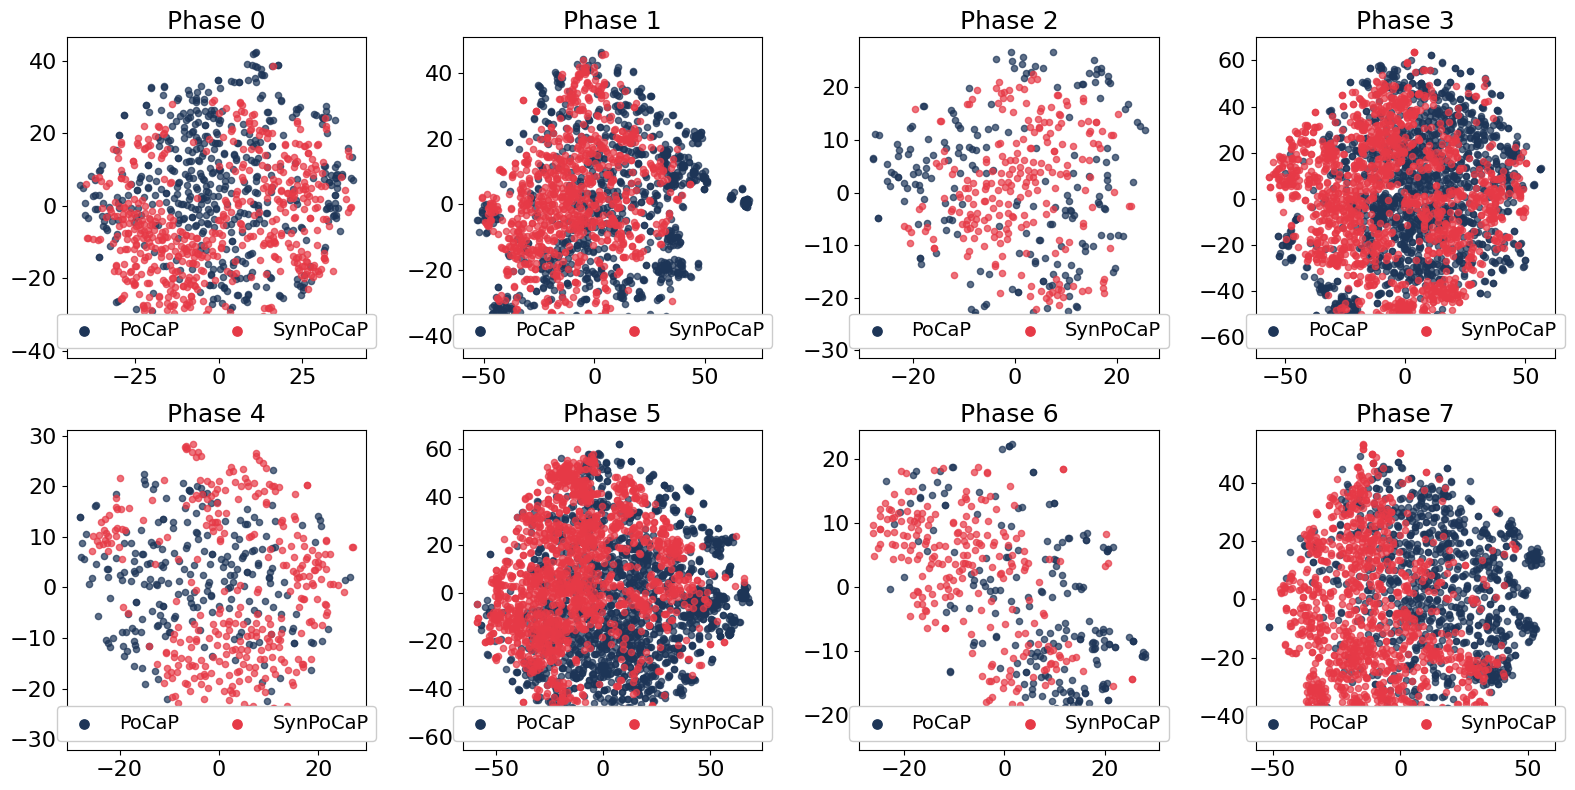

In [8]:
plot_sentence_embed(
    syn_sentence_embed[::20, :],
    real_sentence_embed,
    syn_sentence_label[::20],
    real_sentence_label,
    'Figure5.jpg'
)